In [4]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

#### Creating auto-encoder class

In [5]:
class Autoencoder(object):
    
    def __init__(self , input_dim , encoded_dim):
        
        learning_rate = 0.1
        
        hiddel_layer_weights = tf.Variable(tf.random.normal(input_dim , encoded_dim))
        hiddel_layer_biases =  tf.Variable(tf.random.normal(encoded_dim))
        
        hiddel_layer_weights = tf.Variable(tf.random.normal(encoded_dim , input_dim))
        hiddel_layer_biases =  tf.Variable(tf.random.normal(input_dim))
        
        
        # neural network
        self._input_layer = tf.placeholder('float' , [None , input_dim])
        self._hidden_layer = tf.nn.sigmoid(tf.add(tf.matmul(self._input_layer , hidden_layer_weights) , hidden_layer_biases))
        
        self._output_layer = tf.matmul(self._hidden_layer , output_layer_weights) + output_layer_biases
        self._real_output = tf.placeholder('float' , [None , input_dim])
        
        
        self._meansq = tf.reduce_mean(tf.square(self._output_layer - self._real_output))
        self._optimizer = tf.train.AdagradOptimizer(learning_rate).minimize(self._meansq)
        self._training = tf.global_variables_initializer()
        self._session = tf.Session()
        
        
        
        
    def train(self, input_train, input_test, batch_size, epochs):
        
        self._session.run(self._training)
        
        for epoch in range(epochs):
            
            epoch_loss = 0
            
            for i in range(int(input_train.shape[0]/batch_size)):
                
                epoch_input = input_train[ i * batch_size : (i + 1) * batch_size ]
                _, c = self._session.run([self._optimizer, self._meansq], feed_dict={self._input_layer: epoch_input, self._real_output: epoch_input})
                epoch_loss += c
                print('Epoch', epoch, '/', epochs, 'loss:',epoch_loss)
    
    
    def getEncodeImage(self , image):
        
        encoded_image = self._session.run(self._hidden_layer, feed_dict = {self._input_layer:[image]})
        return encoded_image
        
        
    
    def getDecodedImage(self , image):
        
        decoded_image = self._session.run(self._output_layer, feed_dict = {self._input_layer:[image]})
        return decoded_image

In [7]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Prepare input
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Tensorflow implementation
autoencodertf = Autoencoder(x_train.shape[1] , 32)
autoencodertf.train(x_train , x_test , 100 , 100)
encoded_img = autoencodertf.getEncodedImage(x_test[1])
decoded_img = autoencodertf.getDecodedImage(x_test[1])

InvalidArgumentError: shape must be a vector of {int32,int64}, got shape [] [Op:RandomStandardNormal]

NameError: name 'decoded_img' is not defined

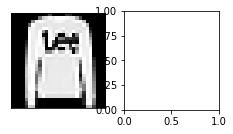

In [8]:
# Tensorflow implementation results
plt.figure(figsize=(20, 4))
subplot = plt.subplot(2, 10, 1)
plt.imshow(x_test[1].reshape(28, 28))
plt.gray()
subplot.get_xaxis().set_visible(False)
subplot.get_yaxis().set_visible(False)

subplot = plt.subplot(2, 10, 2)
plt.imshow(decoded_img.reshape(28, 28))
plt.gray()
subplot.get_xaxis().set_visible(False)
subplot.get_yaxis().set_visible(False)